In [7]:
# !pip install matplotlib==3.4.3
# !pip install --upgrade statsmodels

In [8]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system
import math

from statsmodels.graphics.mosaicplot import mosaic

### Exercise 1

The file lightbulbs.csv contains a random sample of
100 lightbulb lifetimes. The company that produces
these lightbulbs wants to know whether it can claim
that its lightbulbs typically last more than 1000 burning
hours.
1. Identify the null and alternative hypotheses for this
situation.
2. Can this lightbulb manufacturer claim that its
lightbulbs typically last more than 1000 hours at
the 5% significance level? What about at the 1%
significance level?


In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Lightbulbs.csv', sep=";")
df.head()

,Lightbulb,Lifetime
0,1,840.08
1,2,960.00
2,3,953.38
3,4,981.14
4,5,938.66


- $H_0: \mu = 1000$
- $H_1: \mu < 1000$

In [10]:
a5 = 0.05
a1 = 0.01

In [12]:
n = 100                             # Number of samples
sm = df['Lifetime'].mean()          # Sample mean
m0 = 1000
a5 = 0.05                           # 5% significance level
a1 = 0.01                           # 1% significance level
s = np.std(df['Lifetime'],ddof=1)            # Standard deviation

In [13]:
sm

991.0186000000001

In [16]:
p = p = stats.t.cdf(sm, loc=m0, scale=s/np.sqrt(n), df=n-1)
print("p-value: %.5f" % p)
if(p < a5):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-waarde: 0.15142
p > a, dus H0 niet verwerpen


In [158]:
g = m0 - stats.t.isf(a5, df=n-1) * s / np.sqrt(n)
#g = stats.t.isf(a,loc=m0,scale = s/np.sqrt(n),df=n-1)
print("Critical value g ≃ %.3f" % g)
if (sm > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 985.662
sample mean = 991.019 > g = 985.662: do not reject H0


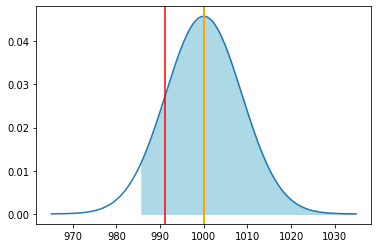

In [159]:
# Gauss-curve
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values
dist_y = stats.t.pdf(dist_x, loc=m0, scale=s/np.sqrt(n), df=n-1)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m0, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue')

### Exercise 2

The file Low calorie soft drinks.csv categorizes 250 randomly
selected consumers on the basis of their gender, their
age, and their preference for our brand or a competitor's
brand of a low-calorie soft drink.   
First make a stacked barplot.  
Then use a test to see whether the drink
preference is independent of gender.

In [160]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Low%20calorie%20soft%20drinks.csv', sep=";")
df.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


<AxesSubplot:xlabel='Gender'>

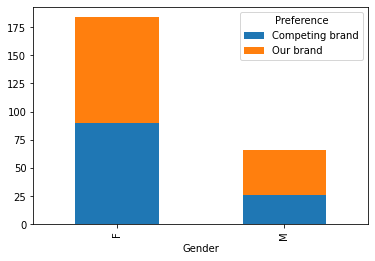

In [161]:
df.groupby(['Gender', 'Preference']).size().unstack().plot(kind='bar', stacked=True)


In [162]:
pd.crosstab(df.Gender,df.Preference)

Preference,Competing brand,Our brand
Gender,,
F,90,94
M,26,40


In [163]:
observed = pd.crosstab(df.Gender, df.Preference)
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)

Chi-squared       : 1.4078
Degrees of freedom: 1
P-value           : 0.2354


In [164]:
cramers_v = np.sqrt(chi2 / (df * n))
print(f'CramerV: {cramers_v}')

CramerV: 0.11864963226958096


| Cramér's V | Interpretation          |
| :---:      | :---                    |
| 0          | No association          |
| 0.1        | Weak association        |
| 0.25       | Moderate association    |
| 0.50       | Strong association      |
| 0.75       | Very strong association |
| 1          | Complete association    |

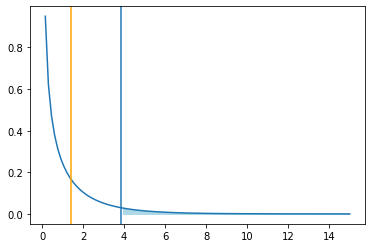

In [165]:
# Is there an association between Gender and Survey?
alpha = 0.05

# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=df)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=df)  # TODO: CHECK this!

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

We see that $\chi^2$ is well within the region of acceptance. The $p$-value is also greater than $\alpha$. Consequently, we cannot reject the null hypothesis and conclude that, based on this sample, there is no reason to believe that there is a significant difference between women's and men's answers to the survey question.


# Exercise 3
The owner of Original Italian Pizza restaurant chain
wants to understand which variable most strongly
influences the sales of his specialty deep-dish
pizza. He has gathered data on the monthly sales of
deep-dish pizzas at his restaurants and observations on
other potentially relevant variables for each of several
outlets in central Indiana. These data are provided in
the file pizzas.csv. Estimate a simple linear regression
equation between the quantity sold (Y) and each
of the following candidates for the best explanatory
variable: average price of deep-dish pizzas, monthly
advertising expenditures, and disposable income per
household in the areas surrounding the outlets. Which
variable is most strongly associated with the number
of pizzas sold? Explain your choice.  
Start by transforming the text values to a float. Divide Quantity Sold, Monthly Advertising Expenditures and Disposable Income Per Househols by 100.  
Make a plot  

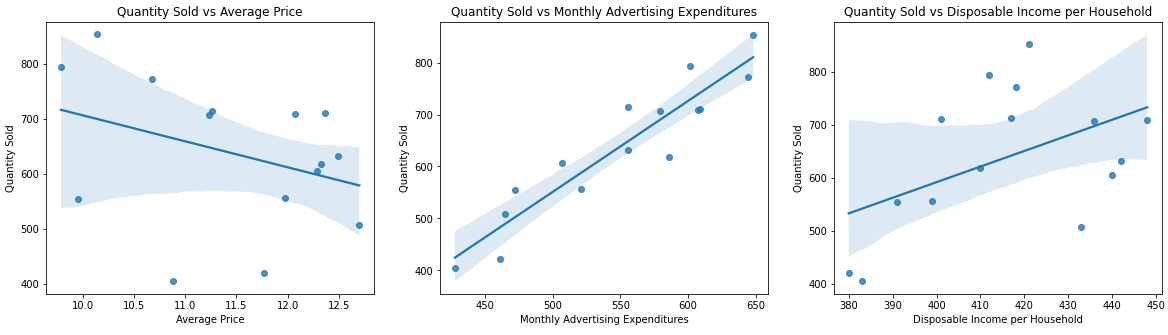

In [166]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/pizzas.csv', sep=";")
df.head()

,Outlet Number,Quantity Sold,Average Price,Monthly Advertising Expenditures,Disposable Income per Household
0,1,85 300,"$10,14",$64 800,$42 100
1,2,40 500,"$10,88",$42 800,$38 300
2,3,61 800,"$12,33",$58 600,$41 000
3,4,50 800,"$12,70",$46 500,$43 300
4,5,60 600,"$12,29",$50 700,$44 000


In [167]:
df.dtypes

Outlet Number                        int64
Quantity Sold                       object
Average Price                       object
Monthly Advertising Expenditures    object
Disposable Income per Household     object
dtype: object

In [168]:
df["Average Price"] = df["Average Price"].str.replace("$", "")
df["Average Price"] = df["Average Price"].str.replace(",", ".")
df["Monthly Advertising Expenditures"] = df["Monthly Advertising Expenditures"].str.replace("$", "")
df["Monthly Advertising Expenditures"] = df["Monthly Advertising Expenditures"].str.replace(" ", "")
df["Disposable Income per Household"] = df["Disposable Income per Household"].str.replace("$", "")
df["Disposable Income per Household"] = df["Disposable Income per Household"].str.replace(" ", "")
df["Average Price"] = df["Average Price"].astype(float)
df["Monthly Advertising Expenditures"] = df["Monthly Advertising Expenditures"].astype(float)
df["Monthly Advertising Expenditures"] = df["Monthly Advertising Expenditures"] / 100
df["Disposable Income per Household"] = df["Disposable Income per Household"].astype(float)
df["Disposable Income per Household"] = df["Disposable Income per Household"] / 100
df["Quantity Sold"] = df["Quantity Sold"].str.replace(" ", "")
df["Quantity Sold"] = df["Quantity Sold"].astype(float)
df["Quantity Sold"] = df["Quantity Sold"] / 100
df.info()

C:\Users\szymo\AppData\Local\Temp\ipykernel_22268\422341021.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Average Price"] = df["Average Price"].str.replace("$", "")
C:\Users\szymo\AppData\Local\Temp\ipykernel_22268\422341021.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Monthly Advertising Expenditures"] = df["Monthly Advertising Expenditures"].str.replace("$", "")
C:\Users\szymo\AppData\Local\Temp\ipykernel_22268\422341021.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Disposable Income per 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Outlet Number                     15 non-null     int64  
 1   Quantity Sold                     15 non-null     float64
 2   Average Price                     15 non-null     float64
 3   Monthly Advertising Expenditures  15 non-null     float64
 4   Disposable Income per Household   15 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 728.0 bytes


Text(0.5, 1.0, 'Quantity Sold vs Disposable Income per Household')

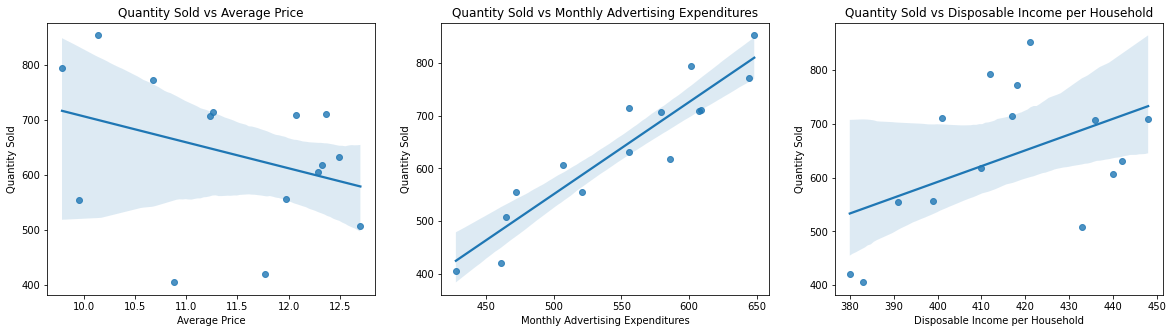

In [170]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
sns.regplot(ax=axs[0], data=df, x='Average Price', y='Quantity Sold')
axs[0].set_title("Quantity Sold vs Average Price")
sns.regplot(ax=axs[1], data=df, x='Monthly Advertising Expenditures', y='Quantity Sold')
axs[1].set_title("Quantity Sold vs Monthly Advertising Expenditures")
sns.regplot(ax=axs[2], data=df, x='Disposable Income per Household', y='Quantity Sold')
axs[2].set_title("Quantity Sold vs Disposable Income per Household")

## 1

In [54]:
from sklearn.linear_model import LinearRegression

x = df['Average Price'].values.reshape(-1,1)
y = df['Quantity Sold']

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = 1177.63 + -47.13 x


In [55]:
cor = np.corrcoef(df['Average Price'], df['Quantity Sold'])[0][1]
print(f"R = {cor}")

R = -0.3502036809966066


In [56]:
print(f"R² = {cor ** 2}")

R² = 0.122642618183573


## 2

In [57]:
from sklearn.linear_model import LinearRegression

x = df['Monthly Advertising Expenditures'].values.reshape(-1,1)
y = df['Quantity Sold']

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = -326.55 + 1.75 x


In [58]:
cor = np.corrcoef(df['Monthly Advertising Expenditures'], df['Quantity Sold'])[0][1]
print(f"R = {cor}")

R = 0.933994400229857


In [59]:
print(f"R² = {cor ** 2}")

R² = 0.8723455396607304


## 3

In [60]:
from sklearn.linear_model import LinearRegression

x = df['Disposable Income per Household'].values.reshape(-1,1)
y = df['Quantity Sold']

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = -583.86 + 2.94 x


In [61]:
cor = np.corrcoef(df['Disposable Income per Household'], df['Quantity Sold'])[0][1]
print(f"R = {cor}")

R = 0.4834832685678616


In [62]:
print(f"R² = {cor ** 2}")

R² = 0.233756070985063
